# <center> Module 4

Group: 12<br>
Darko Petrov<br>
Alexander Lendon

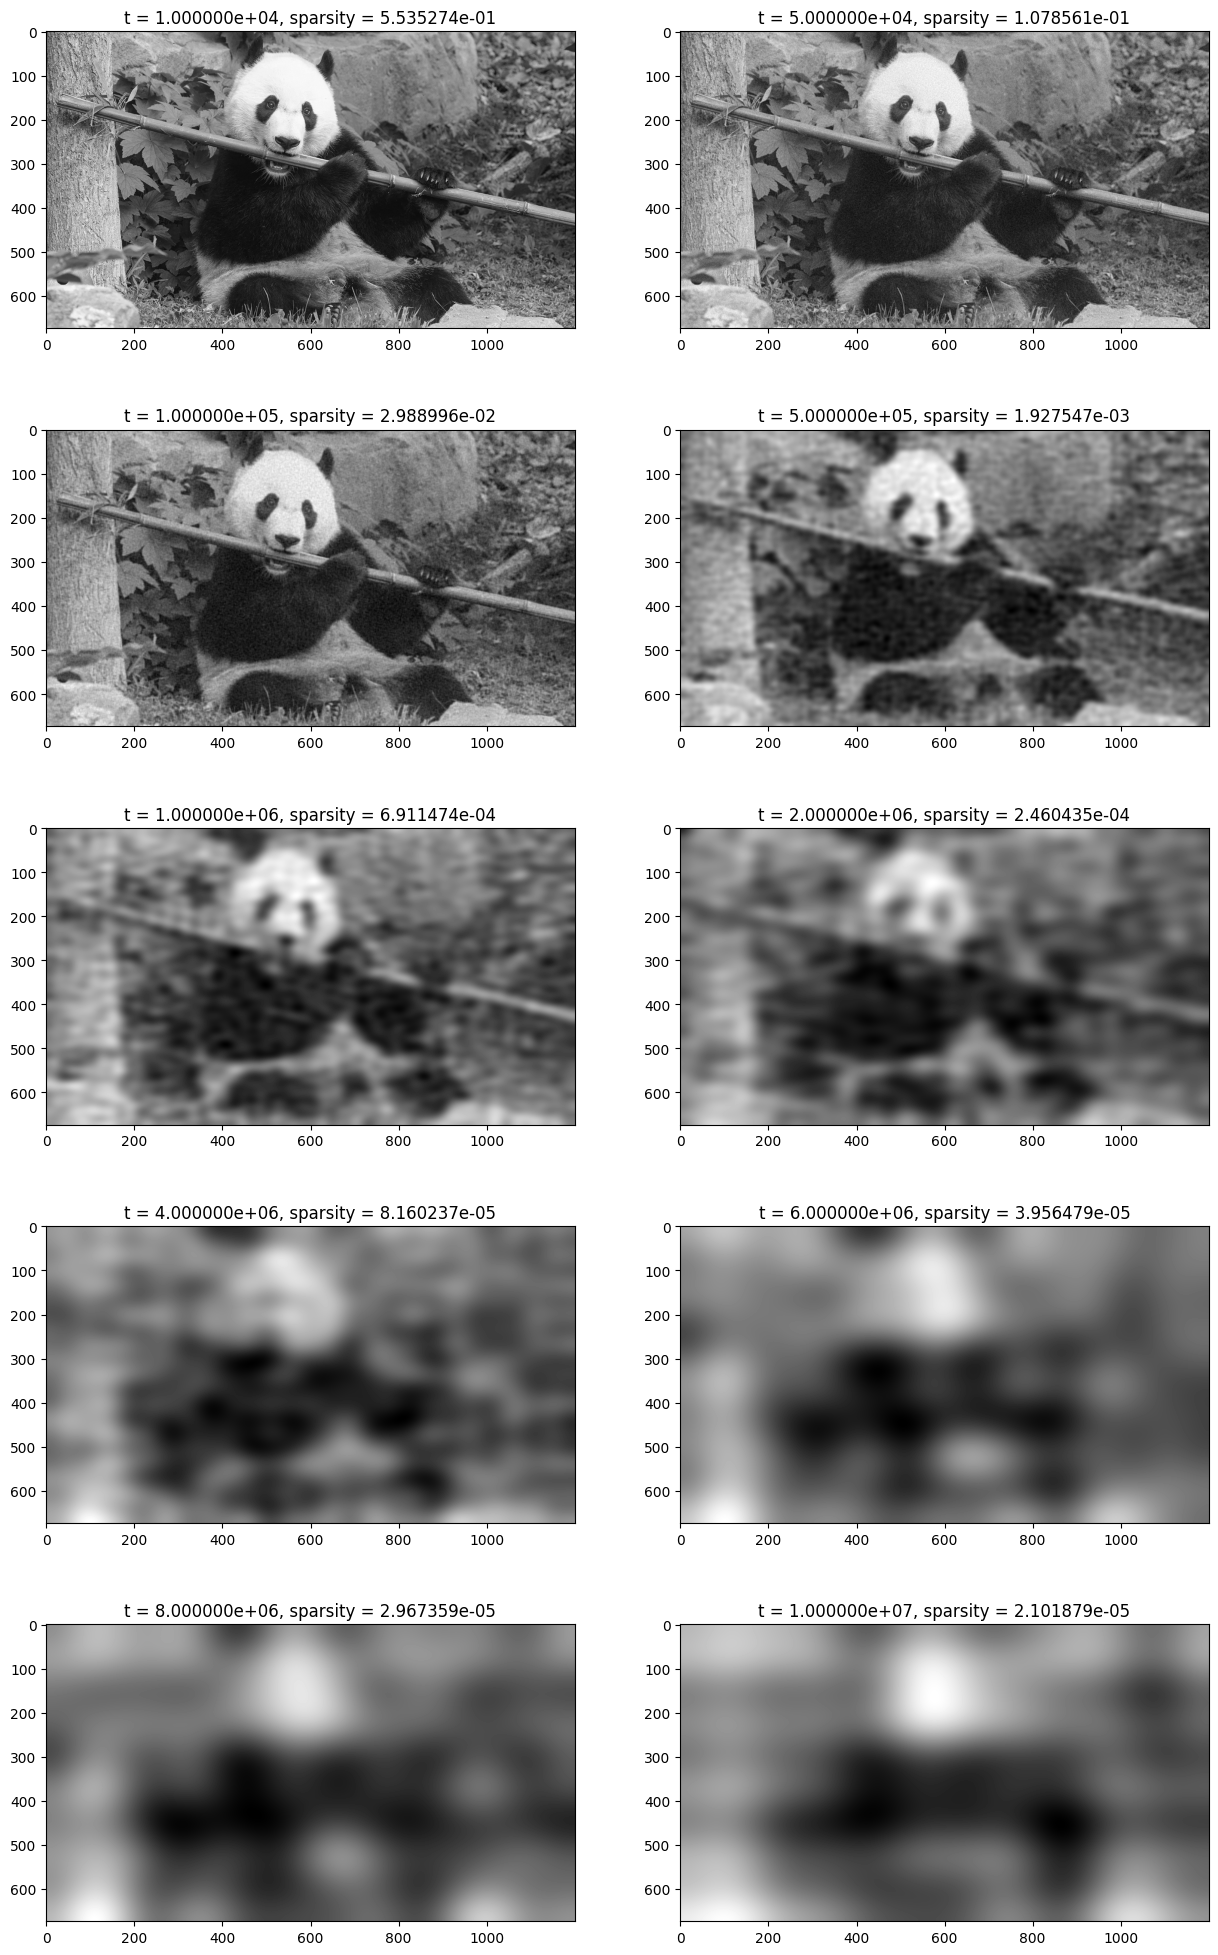

In [18]:
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as transform

img = iio.imread("panda.png")
# generating grayscale image:
bw_img=np.sum(img,2)/3

# 2D DCT transform 
coeffs= transform.dct(transform.dct(bw_img, axis=0),axis=1)
# Set a threshold t and threshold the coefficients in coeffs which will generate
# t = 0.01*np.max(np.abs(coeffs))
t = [1e4, 5e4, 1e5, 5e5, 1e6, 2e6, 4e6, 6e6, 8e6, 1e7]

fig, axs = plt.subplots(5, 2, figsize=(15, 25))
for i in range(5):
    for j in range(2):
        # Apply threshold
        approx_coeffs=coeffs*(abs(coeffs)>t[i*2+j])

        # Calculate sparsity
        sparsity = np.count_nonzero(approx_coeffs) / approx_coeffs.size
        
        
        # Apply 2d idct
        approx_img=transform.idct(transform.idct(approx_coeffs, axis=1),axis=0)
        
        #
        axs[i, j].imshow(approx_img, cmap='gray')
        axs[i, j].set_title(f"t = {t[i*2+j].__format__('e')}, sparsity = {sparsity.__format__('e')}")
    
        
    # # approx_coeffs also calculate the fraction of nonzero coefficients
    # approx_coeffs=coeffs*(abs(coeffs)>i)

    # # Apply 2d idct
    # approx_img=transform.idct(transform.idct(approx_coeffs, axis=1),axis=0)
    
    # #
    # plt.imshow(approx_img, cmap='gray')
# plt.show()


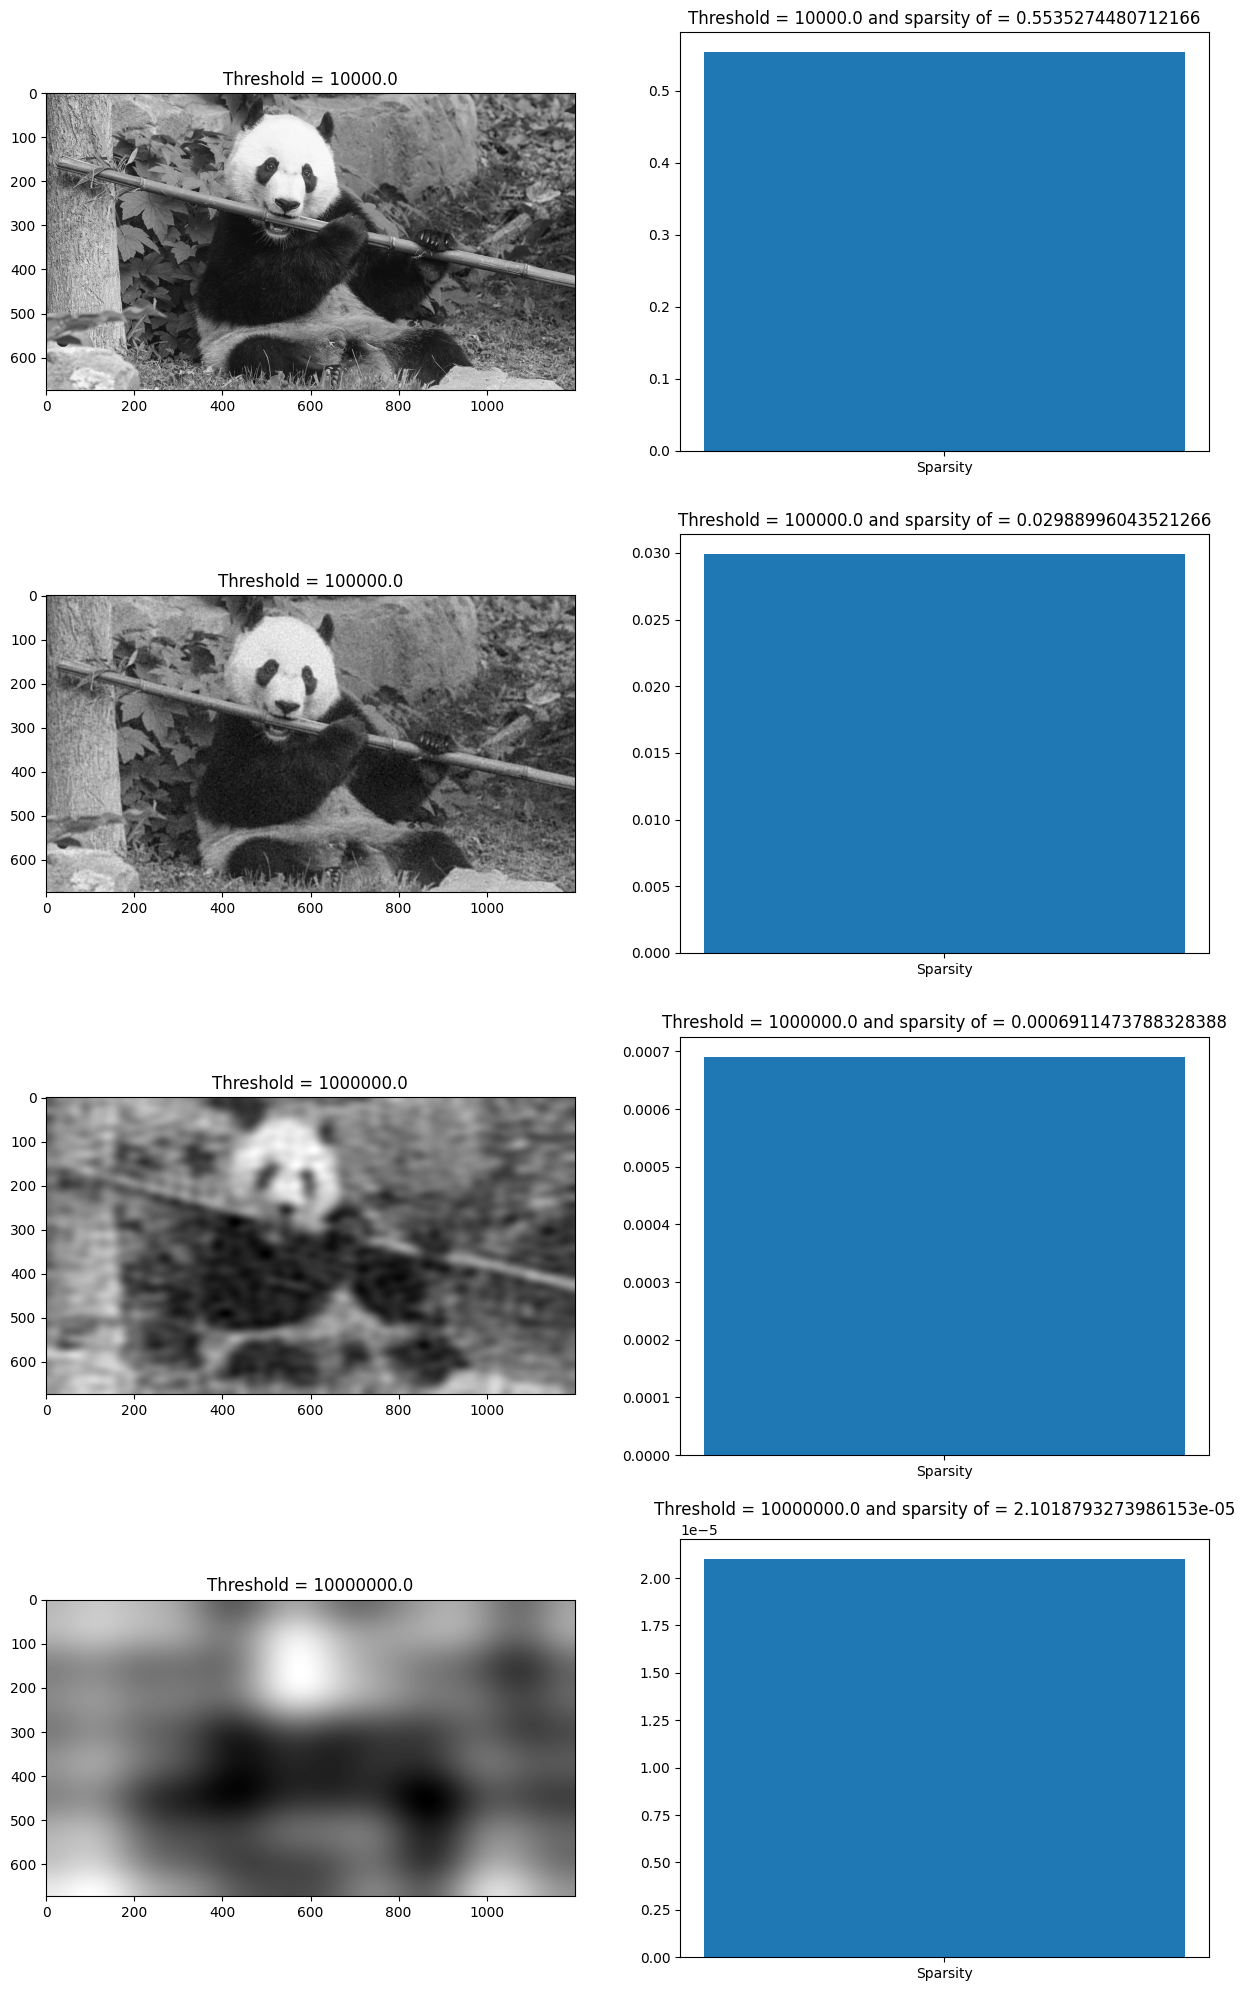

In [3]:
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as transform

img = iio.imread("panda.png")
# generating grayscale image:
bw_img=np.sum(img,2)/3

# 2D DCT transform 
coeffs= transform.dct(transform.dct(bw_img, axis=0),axis=1)
# Set a threshold t and threshold the coefficients in coeffs which will generate
# t = 0.01*np.max(np.abs(coeffs))
t_values = [1e4, 1e5, 1e6, 1e7]  # Threshold values to test

fig, axs = plt.subplots(len(t_values), 2, figsize=(15, 25))
for i, t in enumerate(t_values):
    # Apply threshold
    approx_coeffs = coeffs * (abs(coeffs) > t)

    

    # Apply 2D IDCT
    approx_img = transform.idct(transform.idct(approx_coeffs, axis=1), axis=0)

    # Plot image
    axs[i, 0].imshow(approx_img, cmap='gray')
    axs[i, 0].set_title("Threshold = {}".format(t))

    # Plot sparsity
    axs[i, 1].bar(["Sparsity"], [sparsity])
    axs[i, 1].set_title(f"Threshold = {t} and sparsity of = {sparsity}")

plt.show()
